In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_handler import DataHandler, ScatterDataHandler, BroadcastDataHandler, LatencyDataHandler
import os
from mpl_toolkits.mplot3d import Axes3D

In [23]:
dh_bcast = []
    
for file in os.listdir('../output_data/scatter'):
    if file.endswith('.csv'):
        dh_bcast.append(BroadcastDataHandler(f'../output_data/scatter/{file}'))

In [24]:
dh_bcast_test = [ dh for dh in dh_bcast if dh.entity == 'corelezzo' ]

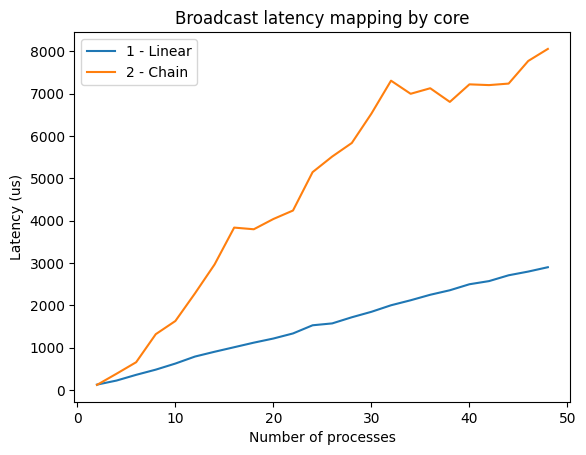

In [27]:
# dh_bcast_socket
size = 1024*1024
bcast_lat_alg1 = np.array([ dh.time(size) for dh in dh_bcast_test if dh.algorithm == 1 ]).flatten()
bcast_lat_alg2 = np.array([ dh.time(size) for dh in dh_bcast_test if dh.algorithm == 2 ]).flatten()
# bcast_lat_alg5 = np.array([ dh.time(size) for dh in dh_bcast_test if dh.algorithm == 5 ]).flatten()
# bcast_lat_alg6 = np.array([ dh.time(size) for dh in dh_bcast_test if dh.algorithm == 6 ]).flatten()


x = np.array([ dh.n_proc for dh in dh_bcast_test if dh.algorithm == 1 ]).flatten()

# Compare with a plot
fig, ax = plt.subplots()
ax.plot(x, bcast_lat_alg1, label='1 - Linear')
ax.plot(x, bcast_lat_alg2, label='2 - Chain')
# ax.plot(x, bcast_lat_alg5, label='5 - Binary Tree')
# ax.plot(x, bcast_lat_alg6, label='6 - Binomial Tree')
ax.set_xlabel('Number of processes')
ax.set_ylabel('Latency (us)')
ax.set_title('Broadcast latency mapping by core')
ax.legend()
plt.show()

In [60]:
print(bcast_lat_alg1)
print(bcast_lat_alg2)

[ 126.    222.22  357.39  479.9   623.76  789.07  902.46 1009.64 1117.33
 1214.94 1334.99 1527.82 1572.21 1717.11 1846.12 2000.56 2118.62 2248.57
 2355.12 2497.02 2571.44 2709.02 2796.63 2899.43]
[ 119.    383.83  655.32 1317.49 1628.77 2281.66 2964.79 3835.27 3795.96
 4038.36 4238.62 5145.24 5513.75 5834.19 6527.81 7305.75 6995.97 7126.84
 6804.27 7219.02 7201.17 7237.19 7771.69 8055.83]


In [56]:
x

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])